# Training NN models:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.cluster import MiniBatchKMeans
import joblib
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from DataGenerator import DataGenerator_Sup

Using TensorFlow backend.


Get a list of all files:

In [2]:
Ad_folder = '../Data/audio_ads' # audion files location

pos_files = []
for r,d,f in os.walk(Ad_folder):
    for filename in f:
        if '.mp3' in filename:
            pos_files.append(os.path.join(Ad_folder,filename))

Music_folder = '../Data/Music' # audion files location

neg_files = []
for r,d,f in os.walk(Music_folder):
    for filename in f:
        if '.mp3' in filename:
            neg_files.append(os.path.join(Music_folder,filename))

How many mp3 files do we have?

In [3]:
n_pos_files = len(pos_files)
n_neg_files = len(neg_files)

print('We have ' + str(n_pos_files) + ' positive examples')
print('We have ' + str(n_neg_files) + ' negative examples')

We have 2303 positive examples
We have 23 negative examples


### Define utility functions:

In [4]:
def create_model(n_features):
    '''Create a model obejct with an input of length n_features'''
    model = Sequential() # create a model instance

    #add model layers
    model.add(Dense(256, activation = 'relu', input_shape=(n_features,)))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model

### Create data generators:

In [5]:
train_size = 0.8

n_train_pos = int(np.floor(0.01*n_pos_files*train_size))
n_train_neg = int(np.floor(n_neg_files*train_size))
train_files_pos = pos_files[:n_train_pos]
train_files_neg = neg_files[:n_train_neg]
test_files_pos = pos_files[n_train_pos:]
test_files_neg = neg_files[n_train_neg:]

train_generator = DataGenerator_Sup(train_files_pos, train_files_neg, dataset='train')
test_generator = DataGenerator_Sup(test_files_pos, test_files_neg, dataset='test')

Check generators:

In [6]:
if 1:
    X, Y = train_generator.__getitem__(0) # get item
    print(X.shape)
    print(Y.shape)

(100, 1690)
(100, 1)


### Train NN model:

Create and compile model:

In [7]:
model = create_model(X.shape[1])
# checkpoint = ModelCheckpoint()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Train model:

In [14]:
H = model.fit_generator(generator = train_generator, epochs = 10)

Epoch 1/10
3/3 [==============================] - 44s 15s/step - loss: 2.9086 - acc: 0.8110
Epoch 2/10
3/3 [==============================] - 47s 16s/step - loss: 3.2393 - acc: 0.7923
Epoch 3/10
3/3 [==============================] - 49s 16s/step - loss: 2.3664 - acc: 0.8481
Epoch 4/10
3/3 [==============================] - 48s 16s/step - loss: 1.8912 - acc: 0.8776
Epoch 5/10
3/3 [==============================] - 43s 14s/step - loss: 3.4172 - acc: 0.7809
Epoch 6/10
3/3 [==============================] - 47s 16s/step - loss: 2.9671 - acc: 0.8108
Epoch 7/10
3/3 [==============================] - 49s 16s/step - loss: 2.4984 - acc: 0.8427
Epoch 8/10
3/3 [==============================] - 47s 16s/step - loss: 1.6983 - acc: 0.8875
Epoch 9/10
3/3 [==============================] - 44s 15s/step - loss: 3.1394 - acc: 0.7995
Epoch 10/10
3/3 [==============================] - 54s 18s/step - loss: 2.9441 - acc: 0.8105


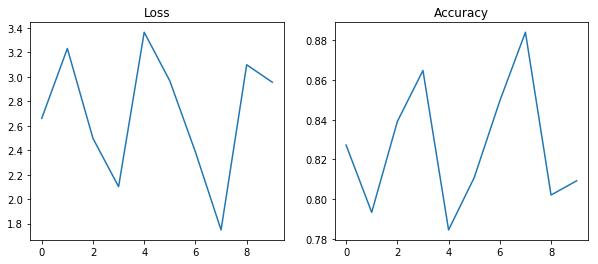

In [15]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.plot(H.history['loss'])
plt.title('Loss')
plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(H.history['acc'])

In [ ]:
# Error files:
train_generatorerator.err_files

### Check Accuracy: